In [138]:
import lasio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats 


In [2]:
log=lasio.read(r'D:/3. Programing/NSO-R2_logs.las')
log=log.df().reset_index()
log.head()

,DEPTH,RHOB,UNKNOWN:1,UNKNOWN:2,DT,SDT
0,437.0,NaN,NaN,NaN,NaN,NaN
1,438.0,NaN,11.0396,1.6723,1848.2698,NaN
2,439.0,NaN,11.0396,1.6723,1848.2698,NaN
3,440.0,NaN,11.0396,1.6723,1848.2698,NaN
4,441.0,NaN,11.0396,1.6723,1848.2698,NaN


In [83]:
log['P-Impedance']=log['DT']*log['RHOB']
log['S-Impedance']=(log['SDT']/3.2808)*log['RHOB']
log['Lambda-Rho']=abs(log['UNKNOWN:1'])
log['Mu-Rho']=log['UNKNOWN:2']
log['VpVs']=log['P-Impedance']/log['S-Impedance']

In [84]:
log.head()

,DEPTH,RHOB,UNKNOWN:1,UNKNOWN:2,DT,SDT,P-Impedance,S-Impedance,Lambda-Rho,Mu-Rho,VpVs
0,437.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,438.0,NaN,11.0396,1.6723,1848.2698,NaN,NaN,NaN,11.0396,1.6723,NaN
2,439.0,NaN,11.0396,1.6723,1848.2698,NaN,NaN,NaN,11.0396,1.6723,NaN
3,440.0,NaN,11.0396,1.6723,1848.2698,NaN,NaN,NaN,11.0396,1.6723,NaN
4,441.0,NaN,11.0396,1.6723,1848.2698,NaN,NaN,NaN,11.0396,1.6723,NaN


In [85]:
# star depth 3450 end depth 4250
logInterval= log[(log.DEPTH >= 3000) & (log.DEPTH <= 4250)]
logInterval=logInterval.reset_index()
logInterval=logInterval.drop(['index'],axis=1)
logInterval.head()

,DEPTH,RHOB,UNKNOWN:1,UNKNOWN:2,DT,SDT,P-Impedance,S-Impedance,Lambda-Rho,Mu-Rho,VpVs
0,3000.0,2.1258,13.0772,2.0856,1953.7261,2228.8044,4153.230943,1444.157643,13.0772,2.0856,2.875885
1,3001.0,2.1024,13.0962,1.9434,1960.1876,2175.3132,4121.098410,1393.982709,13.0962,1.9434,2.956348
2,3002.0,2.1098,13.5553,1.8340,1967.0739,2106.0286,4150.132514,1354.334047,13.5553,1.8340,3.064334
3,3003.0,2.1276,13.8495,1.8086,1964.3193,2073.7717,4179.285743,1344.841706,13.8495,1.8086,3.107641
4,3004.0,2.1349,13.5792,1.8663,1948.9441,2099.4370,4160.800759,1366.157051,13.5792,1.8663,3.045624


In [86]:
logtarget= log[(log.DEPTH >= 3690) & (log.DEPTH <= 4000)]
logtarget.head()

,DEPTH,RHOB,UNKNOWN:1,UNKNOWN:2,DT,SDT,P-Impedance,S-Impedance,Lambda-Rho,Mu-Rho,VpVs
3253,3690.0,2.2749,20.8243,11.4027,2901.0764,4868.8179,6599.658702,3376.028359,20.8243,11.4027,1.954859
3254,3691.0,2.2052,12.1751,9.9012,2561.7454,4680.4443,5649.160956,3145.975302,12.1751,9.9012,1.795679
3255,3692.0,2.1647,8.0259,9.2359,2377.7915,4606.0132,5147.205260,3039.087044,8.0259,9.2359,1.693668
3256,3693.0,2.1730,8.6588,9.4336,2414.3433,4637.2373,5246.367991,3071.420584,8.6588,9.4336,1.708124
3257,3694.0,2.2020,12.0309,9.7035,2545.8105,4641.3223,5605.874721,3115.152312,12.0309,9.7035,1.799551


In [87]:
AIaveragetarget= logtarget['P-Impedance'].mean()

In [88]:
EEItest=AIaveragetarget*(((logInterval['P-Impedance']/AIaveragetarget)**(math.cos(math.radians(180))))*((logInterval['S-Impedance']/AIaveragetarget)**(math.sin(math.radians(180)))))

In [89]:
Chiangle=np.arange(-180,181,1)
EEIVal=[]
for i in range(len(Chiangle)):
    # print(math.sin(math.radians(Chiangle[i])))
    EEI=AIaveragetarget*(((logInterval['P-Impedance']/AIaveragetarget)**(math.cos(math.radians(Chiangle[i]))))*((logInterval['S-Impedance']/AIaveragetarget)**(math.sin(math.radians(Chiangle[i])))))
    EEIVal.append(EEI)

In [90]:
EEIuse=np.array(EEIVal)
EEIValt=np.transpose(EEIuse)


In [91]:
num_rows = len(logInterval['P-Impedance'])
num_cols = len(Chiangle)
data = {}
for i in range(num_cols):
    col_name = f'{Chiangle[i]}'
    data[col_name] = EEIuse[i]
EEIdata = pd.DataFrame(data)

In [92]:
EEIdata.head()

,-180,-179,-178,-177,-176,-175,-174,-173,-172,-171,...,171,172,173,174,175,176,177,178,179,180
0,10868.033374,11162.753051,11463.691853,11770.827726,12084.128070,12403.549263,12729.036204,13060.521851,13397.926784,13741.158770,...,8494.448550,8733.707995,8978.989022,9230.343119,9487.815469,9751.444496,10021.261407,10297.289722,10579.544802,10868.033374
1,10952.772297,11256.721447,11567.286797,11884.453372,12208.195166,12538.474626,12875.242138,13218.435525,13567.979552,13923.785451,...,8512.641805,8757.933132,9009.564936,9267.598201,9532.087488,9803.080452,10080.617340,10364.730490,10655.443817,10952.772297
2,10876.147291,11183.612520,11497.984756,11819.259385,12147.420673,12482.441207,12824.281347,13172.888681,13528.197488,13890.128221,...,8415.744585,8662.400488,8915.595393,9175.400135,9441.879280,9715.090618,9995.084647,10281.904041,10575.583118,10876.147291
3,10800.279110,11106.974731,11420.630587,11741.246222,12068.810157,12403.299329,12744.678531,13092.899862,13447.902176,13809.610551,...,8348.568686,8594.143901,8846.279254,9105.048633,9370.519790,9642.753834,9921.804709,10207.718666,10500.533721,10800.279110
4,10848.260976,11153.250219,11465.043636,11783.634855,12109.006511,12441.129701,12779.963451,13125.454181,13477.535185,13836.126118,...,8405.853777,8650.864472,8902.331087,9160.322039,9424.899511,9696.118952,9974.028569,10258.668810,10550.071832,10848.260976


### EEI For AI

In [93]:
EEIdataforAI=EEIdata
EEIdataforAI['AI']=logInterval['P-Impedance']
corr_matrixAI = EEIdataforAI.corr()['AI']
corr_matrixAI1=corr_matrixAI.iloc[0:361]
searchcorrmatrixAI=np.array([Chiangle,corr_matrixAI1])
searchcorrmatrixAI=np.transpose(searchcorrmatrixAI)
searchdatacorrAI = pd.DataFrame(searchcorrmatrixAI,columns =['Chiangle', 'Correlation'])
searchdatacorrAI.head()
# print(searchdatacorr.max(axis=1))
scattersearchmaxcorAI=searchdatacorrAI[(searchdatacorrAI['Correlation'] ==searchdatacorrAI['Correlation'].max())]



### EEI For SI

In [94]:
EEIdataforSI=EEIdata
EEIdataforSI['SI']=logInterval['S-Impedance']
corr_matrixSI = EEIdataforSI.corr()['SI']
corr_matrixSI1=corr_matrixSI.iloc[0:361]
searchcorrmatrixSI=np.array([Chiangle,corr_matrixSI1])
searchcorrmatrixSI=np.transpose(searchcorrmatrixSI)
searchdatacorrSI = pd.DataFrame(searchcorrmatrixSI,columns =['Chiangle', 'Correlation'])
searchdatacorrSI.head()
# print(searchdatacorr.max(axis=1))
scattersearchmaxcorSI=searchdatacorrSI[(searchdatacorrSI['Correlation'] ==searchdatacorrSI['Correlation'].max())]
print(scattersearchmaxcorSI)

     Chiangle  Correlation
270      90.0          1.0


### EEI For LR

In [95]:
EEIdataforLR=EEIdata
EEIdataforLR['LR']=abs(logInterval['Lambda-Rho'])
corr_matrixLR = EEIdataforLR.corr()['LR']
corr_matrixLR1=corr_matrixLR.iloc[0:361]
searchcorrmatrixLR=np.array([Chiangle,corr_matrixLR1])
searchcorrmatrixLR=np.transpose(searchcorrmatrixLR)
searchdatacorrLR = pd.DataFrame(searchcorrmatrixLR,columns =['Chiangle', 'Correlation'])
searchdatacorrLR.head()
# print(searchdatacorr.max(axis=1))
scattersearchmaxcorLR=searchdatacorrLR[(searchdatacorrLR['Correlation'] ==searchdatacorrLR['Correlation'].max())]       
print(scattersearchmaxcorLR)

     Chiangle  Correlation
160     -20.0      0.96884


### EEI For MR

In [96]:
EEIdataforMR=EEIdata
EEIdataforMR['MR']=logInterval['Mu-Rho']
corr_matrixMR = EEIdataforMR.corr()['MR']
corr_matrixMR1=corr_matrixMR.iloc[0:361]
searchcorrmatrixMR=np.array([Chiangle,corr_matrixMR1])
searchcorrmatrixMR=np.transpose(searchcorrmatrixMR)
searchdatacorrMR = pd.DataFrame(searchcorrmatrixMR,columns =['Chiangle', 'Correlation'])
searchdatacorrMR.head()
# print(searchdatacorr.max(axis=1))
scattersearchmaxcorMR=searchdatacorrMR[(searchdatacorrMR['Correlation'] ==searchdatacorrMR['Correlation'].max())]       
print(scattersearchmaxcorMR)

     Chiangle  Correlation
253      73.0     0.991911


### EEI for Vp/VS

In [97]:
EEIdataforVpVs=EEIdata
EEIdataforVpVs['VpVs']=logInterval['VpVs']
corr_matrixVpVs = EEIdataforMR.corr()['VpVs']
corr_matrixVpVs1=corr_matrixVpVs.iloc[0:361]
searchcorrmatrixVpVs=np.array([Chiangle,corr_matrixVpVs1])
searchcorrmatrixVpVs=np.transpose(searchcorrmatrixVpVs)
searchdatacorrVpVs = pd.DataFrame(searchcorrmatrixVpVs,columns =['Chiangle', 'Correlation'])
searchdatacorrVpVs.head()
# print(searchdatacorr.max(axis=1))
scattersearchmaxcorVpVs=searchdatacorrVpVs[(searchdatacorrVpVs['Correlation'] ==searchdatacorrVpVs['Correlation'].max())]       
print(str(scattersearchmaxcorVpVs))

     Chiangle  Correlation
135     -45.0     0.999629


In [98]:
print(float(scattersearchmaxcorVpVs['Correlation']))

0.9996285437274826


(-100.0, 100.0)

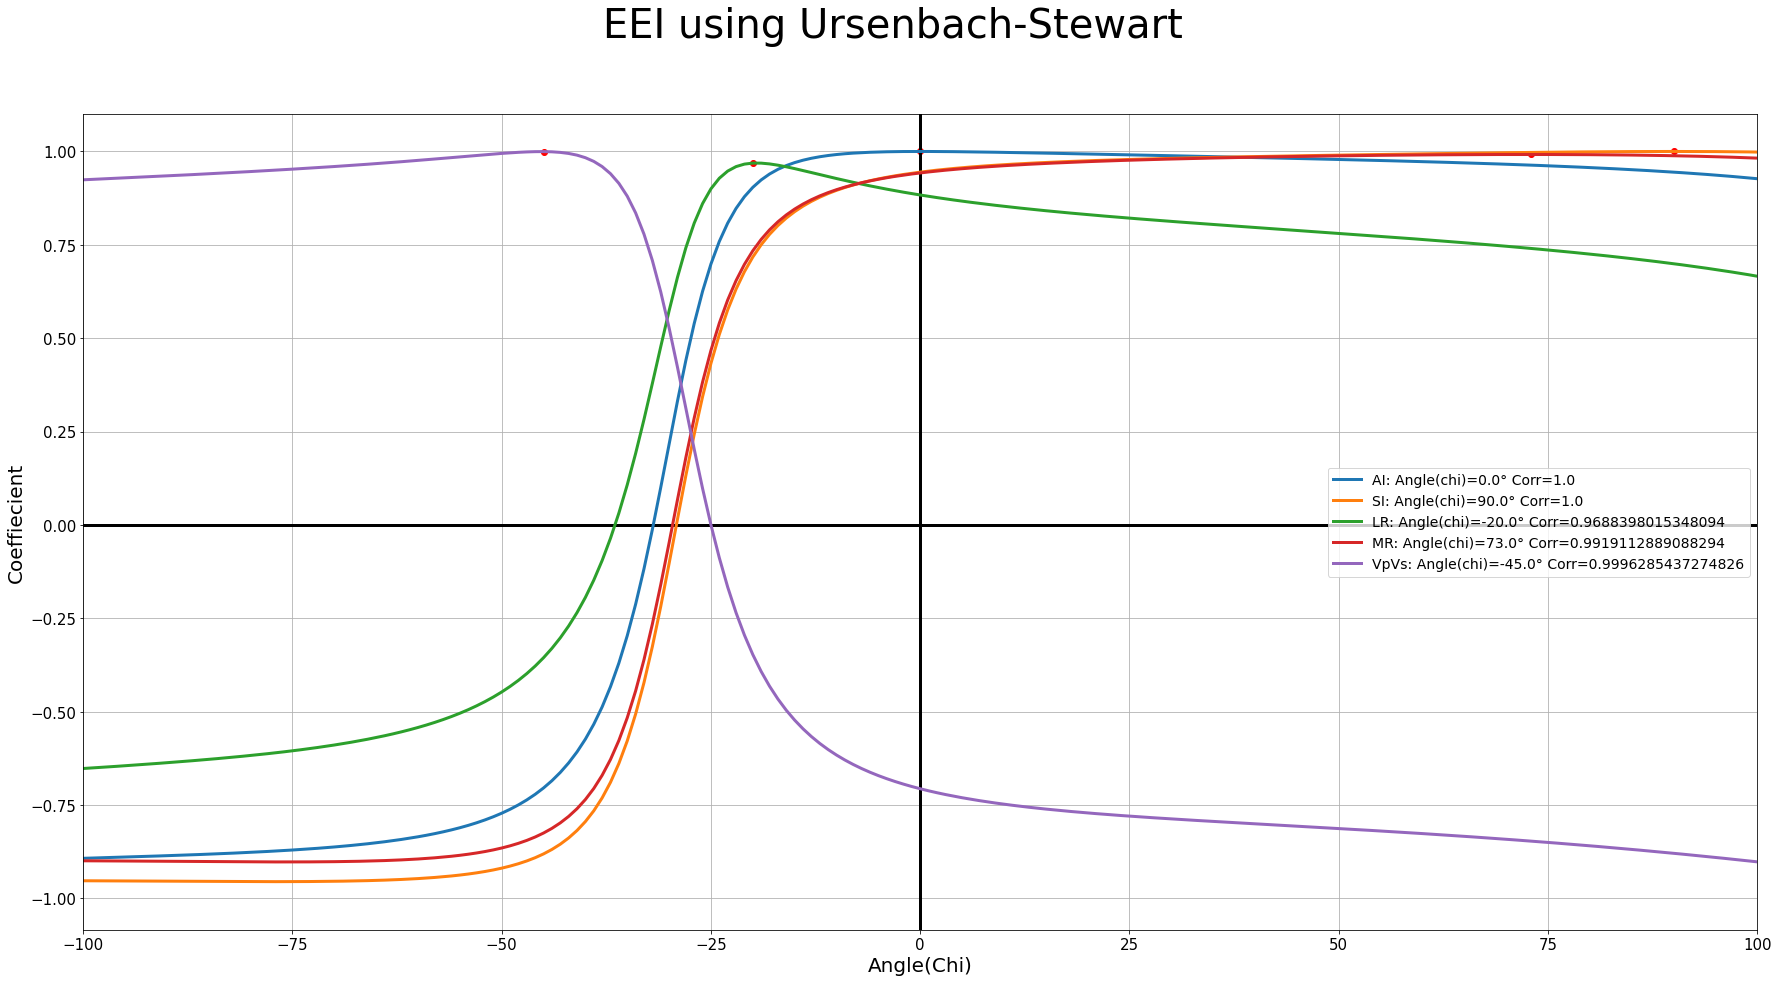

In [99]:
fig,ax=plt.subplots(figsize=(30,15))

plt.grid()
plt.axhline(y=0, color="black",linewidth=3)
plt.axvline(x=0,color="black",linewidth=3)
plt.plot(Chiangle,corr_matrixAI1,label=f"AI: Angle(chi)={float(scattersearchmaxcorAI['Chiangle'])}° Corr={float(scattersearchmaxcorAI['Correlation'])}",linewidth=3)
plt.plot(Chiangle,corr_matrixSI1,label=f"SI: Angle(chi)={float(scattersearchmaxcorSI['Chiangle'])}° Corr={float(scattersearchmaxcorSI['Correlation'])}",linewidth=3)
plt.plot(Chiangle,corr_matrixLR1,label=f"LR: Angle(chi)={float(scattersearchmaxcorLR['Chiangle'])}° Corr={float(scattersearchmaxcorLR['Correlation'])}",linewidth=3)
plt.plot(Chiangle,corr_matrixMR1,label=f"MR: Angle(chi)={float(scattersearchmaxcorMR['Chiangle'])}° Corr={float(scattersearchmaxcorMR['Correlation'])}",linewidth=3)
plt.plot(Chiangle,corr_matrixVpVs1,label=f"VpVs: Angle(chi)={float(scattersearchmaxcorVpVs['Chiangle'])}° Corr={float(scattersearchmaxcorVpVs['Correlation'])}",linewidth=3)
plt.scatter(scattersearchmaxcorAI['Chiangle'],scattersearchmaxcorAI['Correlation'],color='r')
plt.scatter(scattersearchmaxcorSI['Chiangle'],scattersearchmaxcorSI['Correlation'],color='r')
plt.scatter(scattersearchmaxcorLR['Chiangle'],scattersearchmaxcorLR['Correlation'],color='r')
plt.scatter(scattersearchmaxcorMR['Chiangle'],scattersearchmaxcorMR['Correlation'],color='r')
plt.scatter(scattersearchmaxcorVpVs['Chiangle'],scattersearchmaxcorVpVs['Correlation'],color='r')
fig.suptitle('EEI using Ursenbach-Stewart', fontsize=40)
plt.xlabel('Angle(Chi)', fontsize=20)
plt.ylabel('Coeffiecient', fontsize=20)
plt.legend(fontsize=14)
plt.rcParams.update({'font.size': 15})
plt.xlim(-100,100)

##### Display EEI

In [108]:
Welltopdepth=[3566,3682,3816,3990,4220]
topdepth=np.zeros(len(Welltopdepth))
Welltopname = ['Low Keutapang'
                ,'Malacca'
                , 'Intra Malacca 2'
                ,'Intra Malacca 1'
                ,'Bruksah']
    

In [109]:
EEIdisplay= EEIdata
EEIdisplay['Depth']=logInterval['DEPTH']
EEIdisplay['AI']=logInterval['P-Impedance']
EEIdisplay['SI']=logInterval['S-Impedance']
EEIdisplay['LR']=abs(logInterval['Lambda-Rho'])
EEIdisplay['MR']=logInterval['Mu-Rho']
EEIdisplay['VpVs']=logInterval['VpVs']

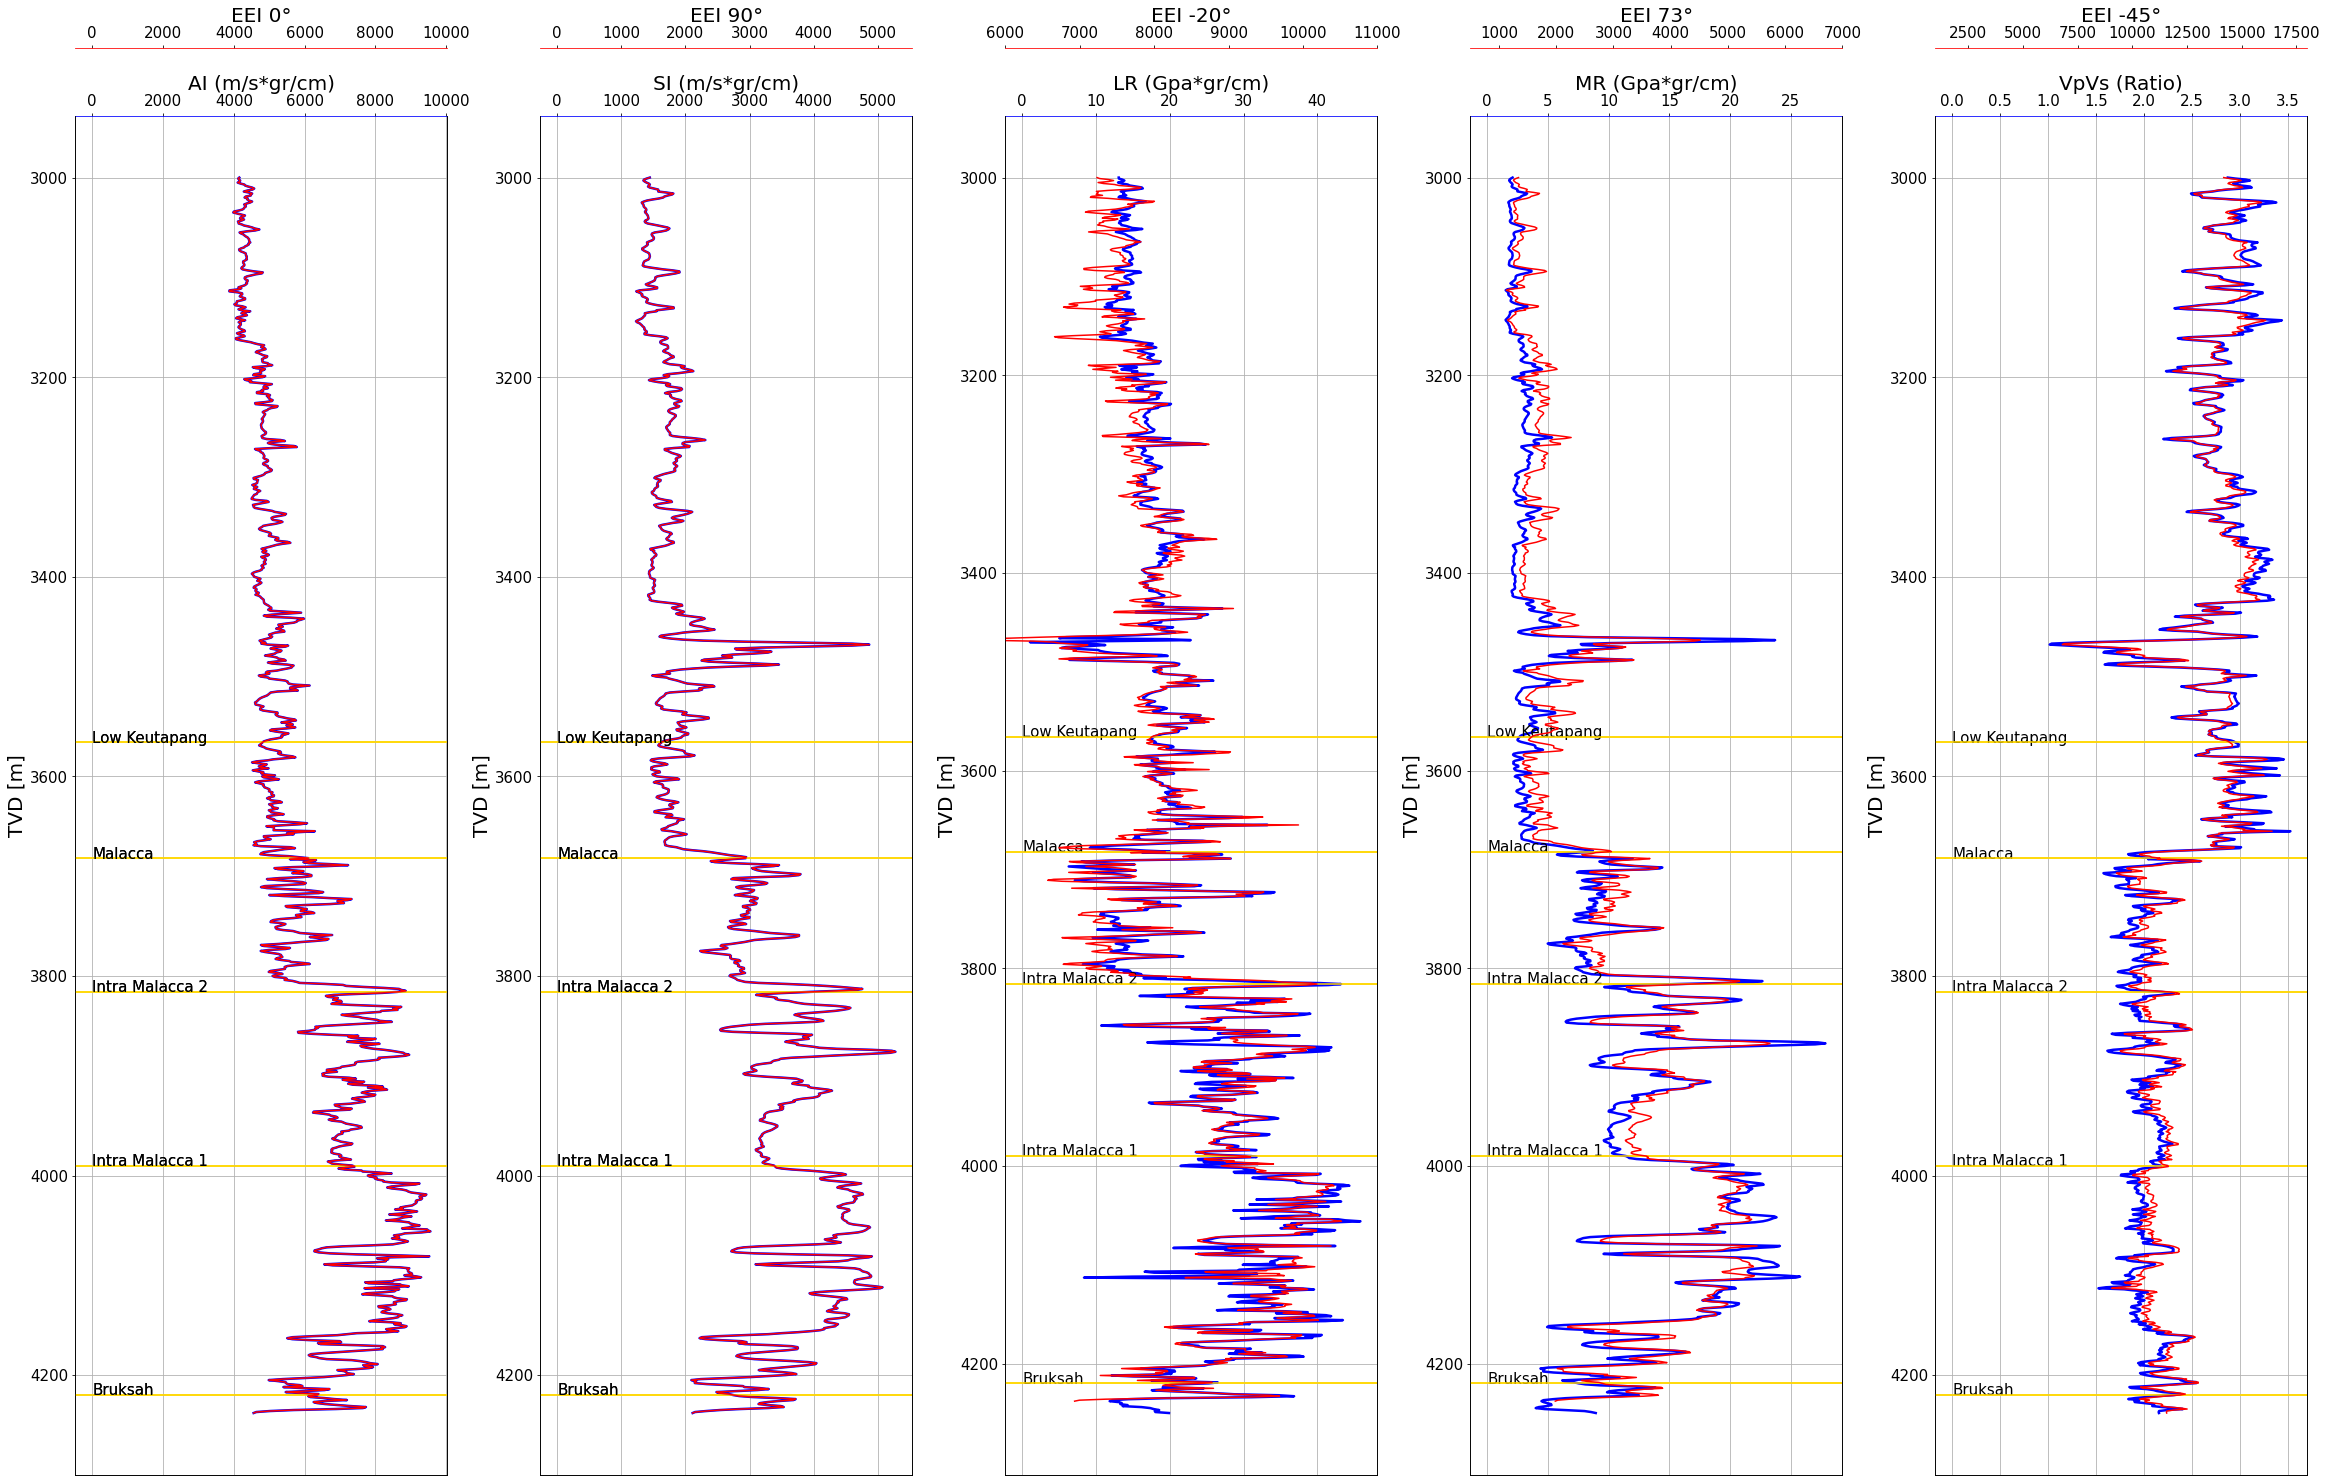

In [135]:
fig, axes = plt.subplots(figsize=(40,25))

curve_names = ['Gamma Ray','Sonic', 'NCT','PPP']


#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1) 
ax2= ax1.twiny()
ax3 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax4= ax3.twiny()
ax5 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax6= ax5.twiny()
ax7 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
ax8= ax7.twiny()
ax9 = plt.subplot2grid((1,5), (0,4), rowspan=1, colspan = 1)
ax10= ax9.twiny()

for i, ax in enumerate(fig.axes):
    ax.scatter(topdepth,Welltopdepth,marker="_",s=10000000,c="gold")

for i, txt in enumerate(Welltopname):
    ax1.annotate(txt, (topdepth[i],Welltopdepth[i]))
    ax2.annotate(txt, (topdepth[i],Welltopdepth[i]))
    ax3.annotate(txt, (topdepth[i],Welltopdepth[i]))
    ax4.annotate(txt, (topdepth[i],Welltopdepth[i]))
    ax5.annotate(txt, (topdepth[i],Welltopdepth[i]))
    ax6.annotate(txt, (topdepth[i],Welltopdepth[i]))
    ax7.annotate(txt, (topdepth[i],Welltopdepth[i]))
    ax8.annotate(txt, (topdepth[i],Welltopdepth[i]))
    ax9.annotate(txt, (topdepth[i],Welltopdepth[i]))
    ax10.annotate(txt, (topdepth[i],Welltopdepth[i]))

#Set up the individual log tracks / subplots
#AI and EEI 0°
ax1.set_xlabel("AI (m/s*gr/cm)",fontsize=20)
ax1.xaxis.set_label_position("top")
ax1.invert_yaxis()
ax1.xaxis.set_ticks_position("top")
ax1.grid()
ax1.plot("AI", "Depth", data = EEIdisplay, color = "b", lw = 2.5)
ax1.spines['top'].set_edgecolor('blue')
ax1.set_ylabel('TVD [m]',fontsize=20)

ax2.set_xlabel("EEI 0°",fontsize=20)
ax2.xaxis.set_label_position("top")
ax2.plot("0", "Depth", data = EEIdisplay, color = "red", lw = 1.5)
ax2.spines['top'].set_edgecolor('red')
ax2.spines["top"].set_position(("axes", 1.05))

#SI and EEI 90°

ax3.set_xlabel("SI (m/s*gr/cm)",fontsize=20)
ax3.xaxis.set_label_position("top")
ax3.invert_yaxis()
ax3.xaxis.set_ticks_position("top")
ax3.grid()
ax3.plot("SI", "Depth", data = EEIdisplay, color = "b", lw = 2.5)
ax3.spines['top'].set_edgecolor('blue')
ax3.set_ylabel('TVD [m]',fontsize=20)

ax4.set_xlabel("EEI 90°",fontsize=20)
ax4.xaxis.set_label_position("top")
ax4.plot("90", "Depth", data = EEIdisplay, color = "red", lw = 1.5)
ax4.spines['top'].set_edgecolor('red')
ax4.spines["top"].set_position(("axes", 1.05))

#LR and EEI -20°

ax5.set_xlabel("LR (Gpa*gr/cm)",fontsize=20)
ax5.xaxis.set_label_position("top")
ax5.invert_yaxis()
ax5.xaxis.set_ticks_position("top")
ax5.grid()
ax5.plot("LR", "Depth", data = EEIdisplay, color = "b", lw = 2.5)
ax5.spines['top'].set_edgecolor('blue')
ax5.set_ylabel('TVD [m]',fontsize=20)

ax6.set_xlabel("EEI -20°",fontsize=20)
ax6.xaxis.set_label_position("top")
ax6.plot("-20", "Depth", data = EEIdisplay, color = "red", lw = 1.5)
ax6.set_xlim(6000,11000)
ax6.spines['top'].set_edgecolor('red')
ax6.spines["top"].set_position(("axes", 1.05))

#MR and EEI 73°

ax7.set_xlabel("MR (Gpa*gr/cm)",fontsize=20)
ax7.xaxis.set_label_position("top")
ax7.invert_yaxis()
ax7.xaxis.set_ticks_position("top")
ax7.grid()
ax7.plot("MR", "Depth", data = EEIdisplay, color = "b", lw = 2.5)
ax7.spines['top'].set_edgecolor('blue')
ax7.set_ylabel('TVD [m]',fontsize=20)

ax8.set_xlabel("EEI 73°",fontsize=20)
ax8.xaxis.set_label_position("top")
ax8.plot("73", "Depth", data = EEIdisplay, color = "red", lw = 1.5)
ax8.spines['top'].set_edgecolor('red')
ax8.spines["top"].set_position(("axes", 1.05))
ax8.set_xlim(500,7000)
#VpVs and EEI 77°

ax9.set_xlabel("VpVs (Ratio)",fontsize=20)
ax9.xaxis.set_label_position("top")
ax9.invert_yaxis()
ax9.xaxis.set_ticks_position("top")
ax9.grid()
ax9.plot("VpVs", "Depth", data = EEIdisplay, color = "b", lw = 2.5)
ax9.spines['top'].set_edgecolor('blue')
ax9.set_ylabel('TVD [m]',fontsize=20)

ax10.set_xlabel("EEI -45°",fontsize=20)
ax10.xaxis.set_label_position("top")
ax10.plot("-45", "Depth", data = EEIdisplay, color = "red", lw = 1.5)
ax10.spines['top'].set_edgecolor('red')
ax10.spines["top"].set_position(("axes", 1.05))
ax10.set_xlim(1000,18000)


fig.subplots_adjust(wspace = 0.25)

In [150]:
EEIdisplay=EEIdisplay.dropna()

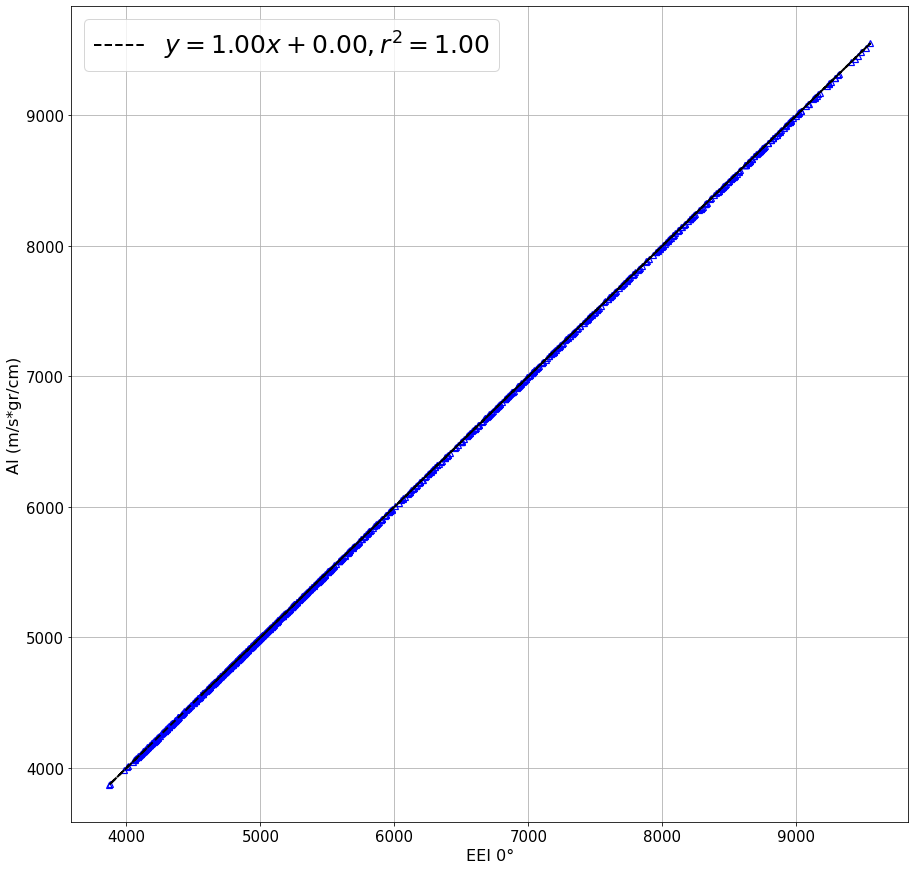

In [161]:
def LIP(x,y,xlab,ylab):
    m,c,r,p,se1=stats.linregress(x,y)
    fig=plt.figure(figsize=(15,15))
    cm1lab="$"+('y=%2.2fx+%2.2f, r^2=%1.2f'%(m,c,r**2))+"$";
    plt.plot(x,y,'^',mfc='none',mec='b',mew=1.2)
    plt.plot(x, m*x+c,'k--',linewidth=2,label=cm1lab)
    plt.ylabel(ylab,fontsize=16)
    plt.xlabel(xlab,fontsize=16)
    plt.legend( loc='upper left',fontsize=25)
    plt.grid()
    return(fig)
#### CALL THE FUNCTION TO GET THE FIGURE
LIP(EEIdisplay['0'], EEIdisplay['AI'],"EEI 0°","AI (m/s*gr/cm)")
####
plt.show()